In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## 1 Загрузка данных

In [19]:
df = pd.read_csv('C:\\Users\\Admin\\Documents\\Python Scripts\\ds_learning\\ds_second_phase\\Files\\monthly-boston-armed-robberies-j.csv', 
                 names=["Month","Count"], header=0)

In [21]:
df["date"] = pd.to_datetime(df["Month"].str.replace('"', ''), format='%Y-%m')

df.set_index("date", inplace=True)
df.drop("Month", axis=1, inplace=True)

## 2 ARIMA

In [25]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [26]:
res = adfuller(df['Count'].dropna())
print(res[1])

0.994277563805723


In [27]:
model = auto_arima(df['Count'].dropna(), seasonal=False, trace=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1205.224, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1199.151, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1195.266, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1203.994, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1189.945, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1193.607, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1191.444, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1193.465, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1194.725, Time=0.03 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 0.894 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  118
Model:

In [28]:
forecast = model.predict(n_periods=12)
print(forecast)

1975-11-01    416.733042
1975-12-01    417.990926
1976-01-01    421.324362
1976-02-01    424.657797
1976-03-01    427.991233
1976-04-01    431.324668
1976-05-01    434.658104
1976-06-01    437.991539
1976-07-01    441.324974
1976-08-01    444.658410
1976-09-01    447.991845
1976-10-01    451.325281
Freq: MS, dtype: float64


In [29]:
train, test = df.iloc[:-12], df.iloc[-12:]

In [30]:
model1 = auto_arima(train['Count'].dropna(), seasonal=False, trace=True)
print(model1.summary())

forecast1 = model.predict(n_periods=len(test))
print(forecast1)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1070.350, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1064.442, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1060.903, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1069.600, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1055.694, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1060.207, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1062.889, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1062.676, Time=0.03 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 0.831 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  106
Model:     

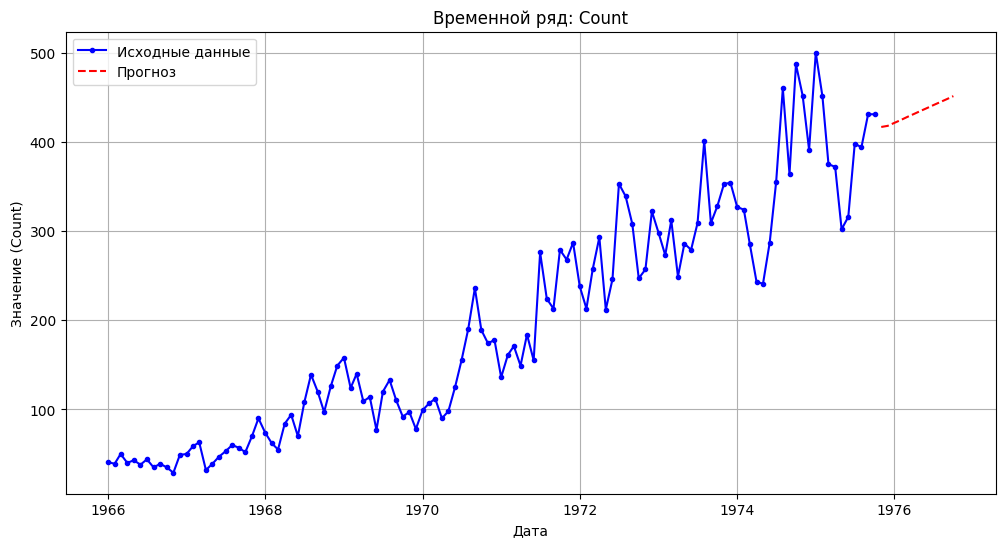

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Count'], label='Исходные данные', color='blue', marker='o', markersize=3)
plt.plot(forecast.index, forecast.values, label='Прогноз', color='red', linestyle='--')
plt.title('Временной ряд: Count')
plt.xlabel('Дата')
plt.ylabel('Значение (Count)')
plt.grid(True)
plt.legend()
plt.show()

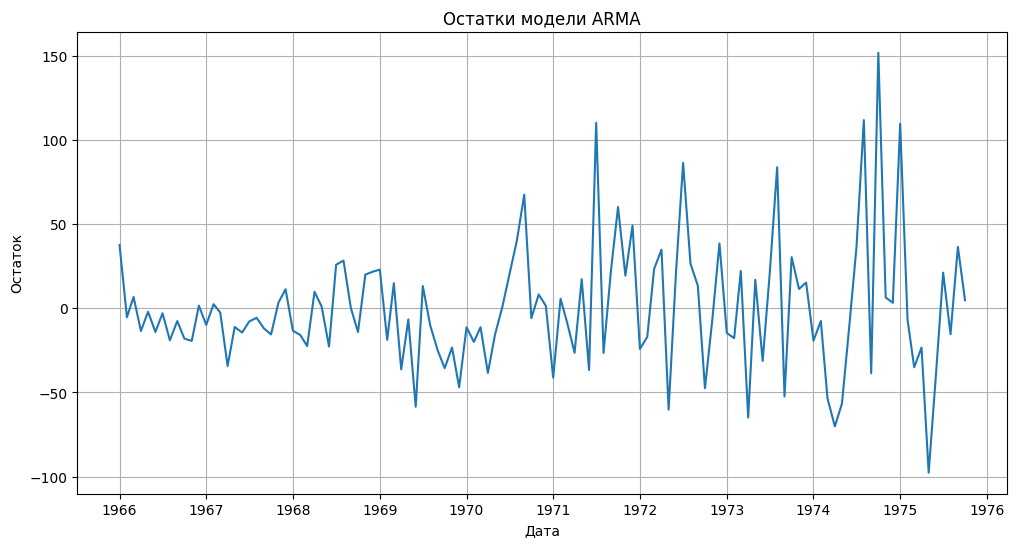

In [40]:
model.fit(df['Count'].dropna())
residuals = model.resid()

plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Остатки модели ARMA')
plt.xlabel('Дата')
plt.ylabel('Остаток')
plt.grid()
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [43]:
y_true = df['Count'].values[-12:]

In [47]:
mae = mean_absolute_error(y_true, forecast)
mse = mean_squared_error(y_true, forecast)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - forecast) / y_true)) * 100

print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAPE: {mape:.2f}%')

MAE: 55.4618
RMSE: 66.3380
MAPE: 15.11%
